In [43]:
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
# load data
df = pd.read_csv('./Data_income/clean_data',index_col=0)
df.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,...,0,1,0,0,0,1,0,0,0,0
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,...,0,0,0,0,1,0,0,0,0,0
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'Y', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife'],
      dtype='object')

In [181]:
df_1 =  df.drop(['hours-per-week'], axis = 1)

In [167]:
df_1

,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,native-country,Y,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,5,77516.0,13.0,7,4,1,2174.0,0.0,23,0,...,0,1,0,0,0,1,0,0,0,0
1,6,83311.0,13.0,15,4,1,0.0,0.0,23,0,...,0,0,0,0,1,0,0,0,0,0
2,4,215646.0,9.0,3,4,1,0.0,0.0,23,0,...,0,0,0,0,0,1,0,0,0,0
3,4,234721.0,7.0,3,2,1,0.0,0.0,23,0,...,0,0,0,0,1,0,0,0,0,0
4,4,338409.0,13.0,14,2,0,0.0,0.0,24,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,4,215419.0,13.0,14,4,0,0.0,0.0,23,0,...,0,0,0,0,0,1,0,0,0,0
48838,2,321403.0,9.0,4,2,1,0.0,0.0,23,0,...,0,0,0,1,0,0,1,0,0,0
48839,4,374983.0,13.0,14,4,1,0.0,0.0,23,0,...,0,0,0,0,1,0,0,0,0,0
48840,4,83891.0,13.0,7,5,1,5455.0,0.0,23,0,...,0,0,0,0,0,0,0,1,0,0


In [168]:
lst1 = list(df_1.columns)
lst1.remove('Y')
lst11 = lst1[0:14]

In [169]:
X = df_1[lst1]
y = df_1['Y']
X.head(3)

,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,native-country,marital-status_ Divorced,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,5,77516.0,13.0,7,4,1,2174.0,0.0,23,0,...,0,1,0,0,0,1,0,0,0,0
1,6,83311.0,13.0,15,4,1,0.0,0.0,23,0,...,0,0,0,0,1,0,0,0,0,0
2,4,215646.0,9.0,3,4,1,0.0,0.0,23,1,...,0,0,0,0,0,1,0,0,0,0


In [170]:
import numpy as np

In [171]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print("Rescaled data:")
print(rescaledX[0:5,:])

Rescaled data:
[[0.5   0.044 0.8   0.429 0.75  1.    0.022 0.    0.537 0.    0.    0.
  0.    1.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.625 0.048 0.8   1.    0.75  1.    0.    0.    0.537 0.    0.    1.
  0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.375 0.138 0.533 0.143 0.75  1.    0.    0.    0.537 1.    0.    0.
  0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.375 0.15  0.4   0.143 0.25  1.    0.    0.    0.537 0.    0.    1.
  0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.375 0.221 0.8   0.929 0.25  0.    0.    0.    0.561 0.    0.    1.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]


In [172]:
rescaledX.shape,y.shape

((48842, 22), (48842,))

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.3)

In [178]:

gb_clf2 = GradientBoostingClassifier(n_estimators=200, min_samples_leaf=50, learning_rate=0.25, max_depth=3, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))



Confusion Matrix:
[[10510   634]
 [ 1377  2132]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11144
           1       0.77      0.61      0.68      3509

    accuracy                           0.86     14653
   macro avg       0.83      0.78      0.80     14653
weighted avg       0.86      0.86      0.86     14653



In [179]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])


[2132, 634]
[1377, 10510]


In [180]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.13724152050774585

In [29]:
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns    


sns.set(rc={'figure.figsize':(11.7,8.27)})


[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'workclass'),
 Text(2.5, 0, 'fnlwgt'),
 Text(3.5, 0, 'education-num'),
 Text(4.5, 0, 'occupation'),
 Text(5.5, 0, 'race'),
 Text(6.5, 0, 'sex'),
 Text(7.5, 0, 'capital-gain'),
 Text(8.5, 0, 'capital-loss'),
 Text(9.5, 0, 'hours-per-week'),
 Text(10.5, 0, 'native-country'),
 Text(11.5, 0, 'Y'),
 Text(12.5, 0, 'marital-status_ Divorced'),
 Text(13.5, 0, 'marital-status_ Married-AF-spouse'),
 Text(14.5, 0, 'marital-status_ Married-civ-spouse'),
 Text(15.5, 0, 'marital-status_ Married-spouse-absent'),
 Text(16.5, 0, 'marital-status_ Never-married'),
 Text(17.5, 0, 'marital-status_ Separated'),
 Text(18.5, 0, 'marital-status_ Widowed'),
 Text(19.5, 0, 'relationship_ Husband'),
 Text(20.5, 0, 'relationship_ Not-in-family'),
 Text(21.5, 0, 'relationship_ Other-relative'),
 Text(22.5, 0, 'relationship_ Own-child'),
 Text(23.5, 0, 'relationship_ Unmarried'),
 Text(24.5, 0, 'relationship_ Wife')]

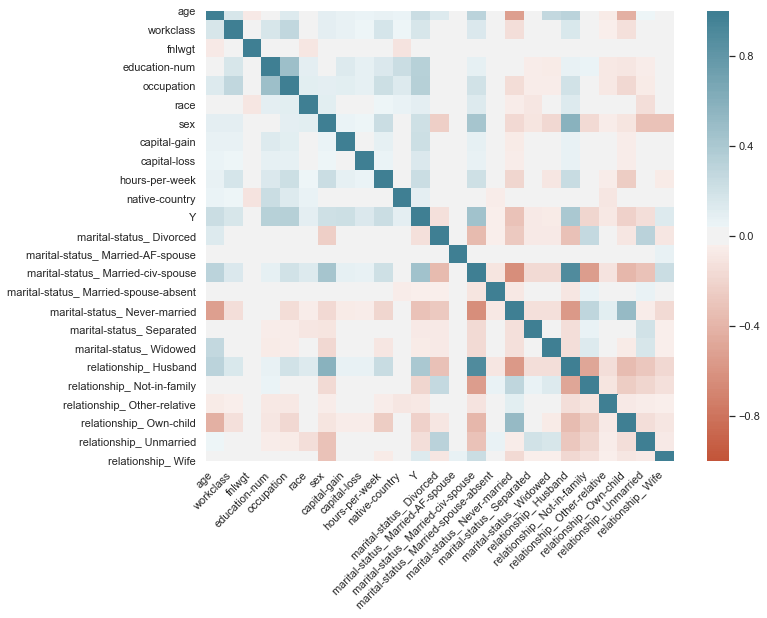

In [39]:

corr = df.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')



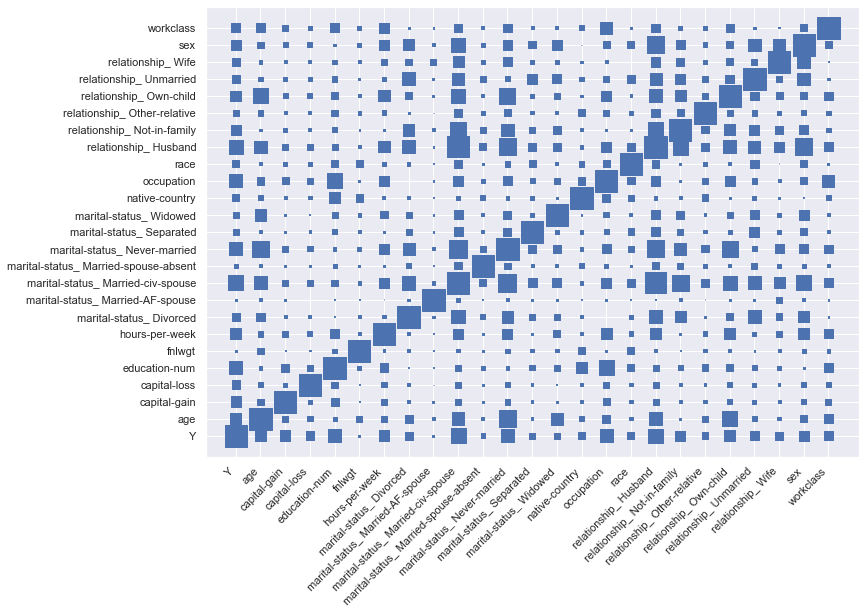

In [42]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

corr = df.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


In [4]:
corr_matrix = df.corr()
print(corr_matrix["Y"].sort_values(ascending=False))

Y                                        1.000000
marital-status_ Married-civ-spouse       0.445853
relationship_ Husband                    0.403791
occupation                               0.344212
education-num                            0.332613
age                                      0.230369
hours-per-week                           0.227687
capital-gain                             0.223013
sex                                      0.214628
workclass                                0.170452
capital-loss                             0.147554
relationship_ Wife                       0.120484
race                                     0.096204
native-country                           0.094950
marital-status_ Married-AF-spouse        0.008977
fnlwgt                                  -0.006339
marital-status_ Married-spouse-absent   -0.039303
marital-status_ Widowed                 -0.065050
marital-status_ Separated               -0.073583
relationship_ Other-relative            -0.085601


In [5]:
lst1 = list(df.columns)
lst1.remove('Y')
lst11 = lst1[0:14]

# Separate out the target

In [6]:
X = df[lst1]
y = df['Y']
X.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,...,0,1,0,0,0,1,0,0,0,0
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,...,0,0,0,0,1,0,0,0,0,0
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
y.shape, X.shape

((48842,), (48842, 24))

In [8]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Adaboost

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [11]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8630291242258279


In [12]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7706830366007016

In [13]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

NameError: name 'X_new' is not defined

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [19]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8637139152392002


In [16]:
X.shape

(48842, 24)

In [17]:
X_test.shape, X_train.shape

((19537, 24), (29305, 24))

In [15]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
# X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:34200], X[34200:]
y_train, y_test = y[:34200], y[34200:]


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=2, min_samples_leaf=5, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)


0.8742658106816009

In [21]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[10430   766]
 [ 1191  2255]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11196
           1       0.75      0.65      0.70      3446

    accuracy                           0.87     14642
   macro avg       0.82      0.79      0.81     14642
weighted avg       0.86      0.87      0.86     14642



In [20]:
# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc

In [20]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=learning_rate, max_depth=3, random_state=42)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.869
Accuracy score (validation): 0.870
Learning rate:  0.075
Accuracy score (training): 0.871
Accuracy score (validation): 0.871
Learning rate:  0.1
Accuracy score (training): 0.874
Accuracy score (validation): 0.872
Learning rate:  0.25
Accuracy score (training): 0.883
Accuracy score (validation): 0.876
Learning rate:  0.5
Accuracy score (training): 0.892
Accuracy score (validation): 0.872
Learning rate:  0.75
Accuracy score (training): 0.893
Accuracy score (validation): 0.869
Learning rate:  1
Accuracy score (training): 0.892
Accuracy score (validation): 0.867


In [21]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=150, min_samples_leaf=5, learning_rate=learning_rate, max_depth=3, random_state=42)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.869
Accuracy score (validation): 0.870
Learning rate:  0.075
Accuracy score (training): 0.872
Accuracy score (validation): 0.871
Learning rate:  0.1
Accuracy score (training): 0.874
Accuracy score (validation): 0.873
Learning rate:  0.25
Accuracy score (training): 0.883
Accuracy score (validation): 0.875
Learning rate:  0.5
Accuracy score (training): 0.890
Accuracy score (validation): 0.874
Learning rate:  0.75
Accuracy score (training): 0.894
Accuracy score (validation): 0.869
Learning rate:  1
Accuracy score (training): 0.893
Accuracy score (validation): 0.867


In [36]:
gb_clf2 = GradientBoostingClassifier(n_estimators=150, min_samples_leaf=5, learning_rate=0.25, max_depth=3, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[10552   644]
 [ 1187  2259]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11196
           1       0.78      0.66      0.71      3446

    accuracy                           0.87     14642
   macro avg       0.84      0.80      0.82     14642
weighted avg       0.87      0.87      0.87     14642



In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])
error = (fp+fn)/(fp+fn+tp+tn)
error

[2259, 644]
[1187, 10552]


In [38]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.12505122251058598

class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]

In [61]:
X_train.shape,y_train.shape

((34200, 24), (34200,))

In [29]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid_search = {"min_samples_split": [2,4,6,8,10],
                     "min_samples_leaf": [10,25,35,50,55,60,75],
                     "n_estimators" : [180,190,200,210,225,250],
                     "learning_rate" : [0.25],
                     "max_depth" : [3,4,5,6,7,8],
                     "subsample" : [0.6,0.7,0.8,0.9]
                    }

In [33]:
model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid_search, cv=5, verbose=5, n_jobs= -1)
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  7.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  presort='auto',
  

In [34]:
print(grid.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 200, 'subsample': 1.0}


# best error yet

In [22]:
gb_clf2 = GradientBoostingClassifier(n_estimators=197, min_samples_leaf=50, learning_rate=0.25, max_depth=3, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[10555   641]
 [ 1171  2275]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11196
           1       0.78      0.66      0.72      3446

    accuracy                           0.88     14642
   macro avg       0.84      0.80      0.82     14642
weighted avg       0.87      0.88      0.87     14642



In [23]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[2275, 641]
[1171, 10555]


In [24]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.12375358557574102

In [26]:
y_test.shape,y_pred.shape

((14642,), (19537,))

In [25]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8014665661830557

best error = 0.12375358557574102
best parameter set: >>> gb_clf2 = GradientBoostingClassifier(n_estimators=197, min_samples_leaf=50,
                                     learning_rate=0.25, max_depth=3, random_state=42)

Confusion Matrix:
[[10555   641]
 [ 1171  2275]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11196
           1       0.78      0.66      0.72      3446

    accuracy                           0.88     14642
   macro avg       0.84      0.80      0.82     14642
weighted avg       0.87      0.88      0.87     14642


gb_clf2 = GradientBoostingClassifier(n_estimators=197, min_samples_leaf=50,
                                     learning_rate=0.25, max_depth=3, random_state=42)


In [ ]:
model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid_search, scoring=gini_scorer2,
                           cv=2, verbose=5, n_jobs= -1)
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [25]:
# from sklearn.metrics import roc_curve, auc
# from sklearn import datasets
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import LinearSVC
# from sklearn.preprocessing import label_binarize
# import matplotlib.pyplot as plt

# # iris = datasets.load_iris()
# # X, y = iris.data, iris.target

# # y = label_binarize(y, classes=[0,1,2])
# n_classes = 2

# # # shuffle and split training and test sets
# # X_train, X_test, y_train, y_test =\
# #     train_test_split(X, y, test_size=0.33, random_state=0)

# # classifier
# clf = OneVsRestClassifier(LinearSVC(random_state=0))
# y_score = clf.fit(X_train, y_train).decision_function(X_test)

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot of a ROC curve for a specific class
# for i in range(n_classes):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()